# Data Bootcamp:  Examples

Most of what we do in this course is find some data that interests us, read it into Python, organize it in a convenient form, and produce a graph.  The details vary, but that's the general plan.  The best-case scenario:  The graph tells us something we don't know, and points to other things we'd like to follow up on.  As for the Python code: You'll be able to do all this and more by the end of the term.  

Examples follow.  All of them are based on data that's accessible in some form on the internet.  

* GDP per person around the world
* Employment trends 
* Economic conditions in the US 
* Government debt in Greece and elsewhere
* Stock prices:  Apple and Google 
* Equity returns:  Fama-French "factors"
* Equity options 
* Income by college major 
* Japan's aging population 

This IPython notebook was created by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

The tradition is to put import statements at the top and be done with them.  But since we sometimes run sections of code separately, we've repeated some of them below.  That's ok, a second import is redundant but does only aesthetic harm.  

In [135]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-02-07
What version of Python are we running? 
3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Dec  7 2015, 15:00:12) [MSC v.1900 64 bit (AMD64)]


---
## Example:  Comparing countries by GDP and GDP per capita

**GDP** is the total value of output produced in a country.  **GDP per capita** is the per person version -- GDP divided by the population.  Both are expressed here in 2011 US dollars with an adjustment for the cost of living.  They come from the World Bank's *World Development Indicators*, a great source of information about economic and social conditions around the world.  See the World Bank's [data catalog](http://datacatalog.worldbank.org/) for other things you can find here.

In [136]:
from pandas.io import wb               # World Bank api 

# read data from World Bank  
var  = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD']         # variable list 
iso  = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']  # country list (ISO codes)
year = 2014 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data 
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp']          # rename variables 
df['gdp'] = df['gdp']/10**12           # convert to trillions
df['gdppc'] = df['gdppc']/10**3        # convert to thousands 
df['order'] = [5, 3, 1, 4, 2, 6, 0]    # reorder countries 
df = df.sort_values(by='order', ascending=False)
df

,gdppc,gdp,order
country,,,
Mexico,16.284152,2.041802,6
Brazil,15.109826,3.113801,5
India,5.438616,7.044594,4
China,12.599182,17.188686,3
Japan,35.634971,4.530338,2
France,37.214407,2.463852,1
United States,52.117746,16.618111,0


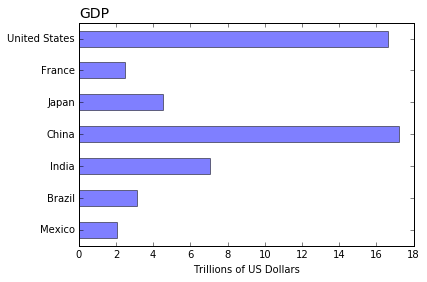

In [137]:
# GDP bar chart 
ax = df['gdp'].plot(kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

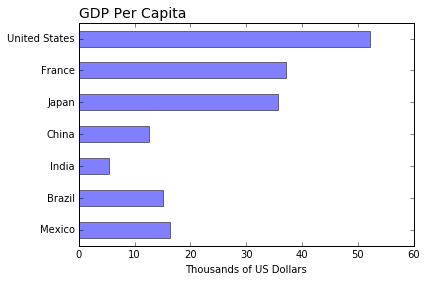

In [138]:
# ditto for GDP per capita (per person)
ax = df['gdppc'].plot(kind='barh', color='blue', alpha=0.5) 
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  GDP per person back to 1870

Angus Maddison somehow constructed GDP and population numbers going back to the year 0 in some cases.  And from 1870 on, we have more or less complete time series for many countries.  The figures below look at several countries over this period, which shows us significant differences not only in their current level of performance, but in their histories.  His work in now continued as the [Maddison Project](http://www.ggdc.net/maddison/maddison-project/home.htm).  

In [139]:
# read the data 
url = 'http://www.ggdc.net/maddison/maddison-project/data/mpd_2013-01.xlsx'
mpd = pd.read_excel(url, skiprows=2, index_col=0, na_values=[' ']) 
#list(mpd) 

In [140]:
# extract countries, convert to log base 2 
mpd = mpd[['England/GB/UK', 'USA', 'Japan ', 'China ', 'India ', 'Argentina ']].dropna()
mpd = mpd.rename(columns={'England/GB/UK': 'UK'})
mpd = np.log(mpd)/np.log(2)

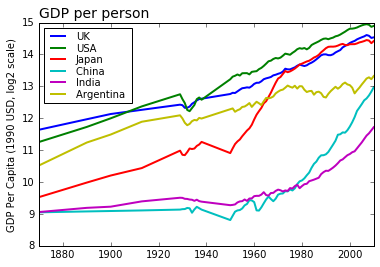

In [141]:
# plot 
ax = mpd.plot(lw=2)
ax.set_title('GDP per person', fontsize=14, loc='left')
ax.set_ylabel('GDP Per Capita (1990 USD, log2 scale)')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Comment:**  Each difference of one on the y axis represents a factor of two.  

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?   

## Example:  Employment trends  

Not long ago, the US had more people working (a higher fraction of the adult population) than many other developed countries.  Over the past 15 years things have flipped.  The deep question is why, but here we simply report what we know.   

The key variables are the **employment rate** (fraction of people aged 25-54) and the **participation rate** (fraction either working or unemployed).  They're similar but the latter irons out some of the cyclical fluctuations.  We get the data from FRED, but they get it from the OECD's Main Economic Indicators, which covers mostly rich countries.  

In [142]:
import pandas as pd                   # data management
import datetime as dt                 # time and date tool 
import pandas.io.data as web          # data interface (soon to be moved, see warning)

In [143]:
# countries = AU, CA, CH, DE, ES, EU, EZ, FR, GB, JP, KR, NL, O1 (OECD), SE, US, ZA 
countries = ['CA', 'DE', 'GB', 'JP', 'US']
emcodes = ['LREM25TT' + c + 'Q156S' for c in countries]
lrcodes = ['LRAC25TT' + c + 'Q156S' for c in countries]

start_date = dt.datetime(2000, 1, 1)
em = web.DataReader(emcodes, 'fred', start_date)
lr = web.DataReader(lrcodes, 'fred', start_date)
em.columns = countries
lr.columns = countries
em.head(3)

,CA,DE,GB,JP,US
DATE,,,,,
2000-01-01,79.900000,NaN,79.913064,78.392194,81.683615
2000-04-01,79.900000,NaN,80.184368,78.838946,81.616079
2000-07-01,79.833333,NaN,80.442829,78.744605,81.277837
2000-10-01,79.933333,NaN,80.347519,78.841059,81.354137
2001-01-01,80.033333,NaN,80.495900,79.007987,81.169274


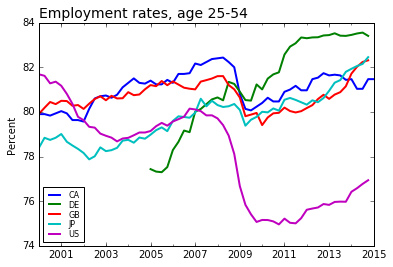

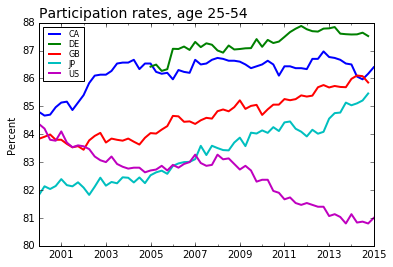

In [144]:
def emplot(em, title): 
    ax = em.plot(lw=2)
    ax.set_title(title, fontsize=14, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Percent')
    ax.legend(loc='best', fontsize=8, handlelength=2, labelspacing=0.1)
    
emplot(em, 'Employment rates, age 25-54')
emplot(lr, 'Participation rates, age 25-54')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?   

---
## Example:  US economic conditions 1

We see a lot of variation in GDP growth rates in all countries.  It's not obvious why, but it's  a fact of life.  Here we look at US GDP and its growth rate. 

In [145]:
# get data from FRED
import pandas.io.data as web           # web interface with FRED
import datetime as dt                  # handles dates 
import matplotlib.pyplot as plt        # plotting 

fred_series = ["GDPC1"]                                       # the real GDP code for FRED
start_date = dt.datetime(1960, 1, 1)
fred = web.DataReader(fred_series, "fred", start_date)/10**3  # convert to trillions of USD 

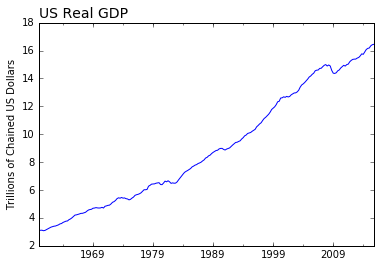

In [146]:
# plot 
ax = fred.plot(legend=False)
ax.set_title('US Real GDP', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Trillions of Chained US Dollars')
ax.legend().set_visible(False)

Average growth rate (percent): GDPC1    3.004432
dtype: float64


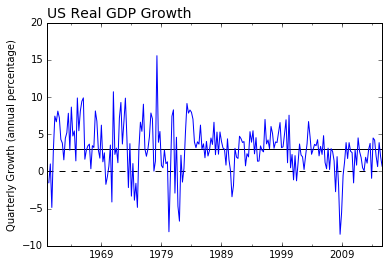

In [147]:
# compute quarterly growth rates 
g = 400*fred.pct_change()           # 400 makes this an annual percentage  
gbar = g.mean()
print('Average growth rate (percent):', gbar)

start = g.index[0]                  # first observation 
end   = g.index[-1]                 # last observation 

ax = g.plot()
ax.set_title('US Real GDP Growth', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Quarterly Growth (annual percentage)')
ax.hlines(y=gbar, xmin=start, xmax=end)
ax.hlines(y=0, xmin=start, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

---
## Example:  US economic conditions 2

Employment, asset returns, and many other things are tied to the state of the economy.  We generally have a lot more information than GDP, including information that is released earlier.  Of the hundreds of economic indicators, some of the most popular (with their FRED codes) are 

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  premits for new housing
* NAPM:  purchasing managers index 

All of them are monthly.  You can find more about this kind of thing in [our book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course), chapter 11.  

In [148]:
# get data from FRED
import pandas as pd 
import pandas.io.data as web           # web interface with FRED
import datetime as dt                  # handles dates 

# get data 
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'NAPM']
start_date = dt.datetime(1970, 1, 1)
inds = web.DataReader(indicators, "fred", start_date)
end = inds.index[-1]

# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
g_std = (g - g.mean()) / g.std()

# correlations 
g_std.corr()

,INDPRO,PAYEMS,AWHMAN,PERMIT,NAPM
INDPRO,1.000000,0.807832,0.631447,0.281613,0.333352
PAYEMS,0.807832,1.000000,0.316111,0.100107,-0.008923
AWHMAN,0.631447,0.316111,1.000000,0.463322,0.704847
PERMIT,0.281613,0.100107,0.463322,1.000000,0.550834
NAPM,0.333352,-0.008923,0.704847,0.550834,1.000000


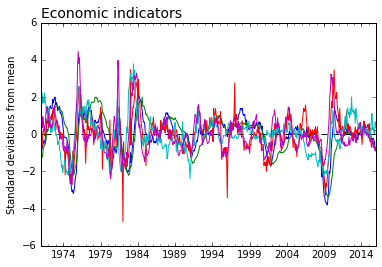

In [149]:
# plot 
ax = g_std.plot()
ax.set_title('Economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

In [150]:
# focus on recent past 
recent_date = dt.datetime(2011, 1, 1)
g_std = g_std[g_std.index>=recent_date]

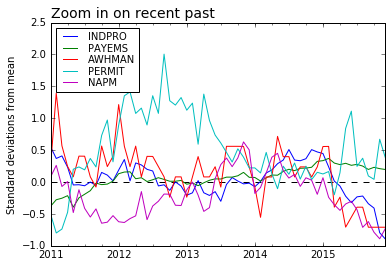

In [151]:
ax = g_std.plot()
ax.set_title('Zoom in on recent past', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=recent_date, xmax=end, linestyles='dashed')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Question for Chase or Spencer:** Can we do a heatmap of this?   

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Government debt 

Governments typically issue debt, and one of the traditional ways for a country to get into trouble is to issue so much debt that investors worry about getting paid back.  How much is that?  Hard to say, but we'll look at some debt numbers from the IMF's World Economic Outlook or [WEO](https://www.imf.org/external/ns/cs.aspx?id=28), a popular source of international data on debt, deficits, and other macroeconomic indicators.  We use numbers for the ratio of government debt to GDP.  

In [152]:
%%time 
import pandas as pd
import matplotlib.pyplot as plt

url1 = 'http://www.imf.org/external/pubs/ft/weo/2015/01/weodata/'
url2 = 'WEOApr2015all.xls'
url = url1 + url2 
weo = pd.read_csv(url, sep='\t', thousands=',', na_values=['n/a', '--']) 
weo.shape

Wall time: 25.6 s


In [153]:
list(weo[list(range(12))])

['WEO Country Code',
 'ISO',
 'WEO Subject Code',
 'Country',
 'Subject Descriptor',
 'Subject Notes',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '1980',
 '1981',
 '1982']

In [154]:
country_guide = weo[['ISO', 'Country']].drop_duplicates().set_index('ISO')

variable_guide = weo[['WEO Subject Code', 'Subject Descriptor', 'Subject Notes']].drop_duplicates().set_index('WEO Subject Code')
variable_guide.head(3)

,Subject Descriptor,Subject Notes
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",Expressed in billions of national currency uni...
NGDP_RPCH,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...
NGDP,"Gross domestic product, current prices",Expressed in billions of national currency uni...
NGDPD,"Gross domestic product, current prices",Values are based upon GDP in national currency...
NGDP_D,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...


In [155]:
variables = ['GGXWDG_NGDP']
countries = ['ARG', 'DEU', 'FRA', 'GRC', 'USA']
debt = weo[weo['ISO'].isin(countries) & weo['WEO Subject Code'].isin(variables)]
some = [3] + list(range(9,44))
debt = debt[some].set_index('Country').T.dropna()
debt.head(3)

Country,Argentina,France,Germany,Greece,United States
2001,44.886,57.943,57.529,99.922,53.022
2002,137.512,59.840,59.169,98.114,55.379
2003,116.525,63.947,62.920,94.094,58.516
2004,106.032,65.515,64.599,94.894,65.493
2005,71.243,67.004,66.801,98.126,64.890


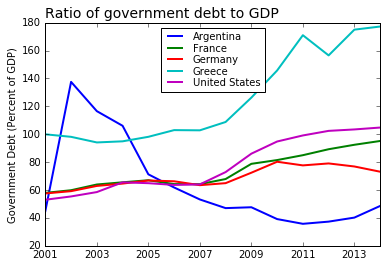

In [156]:
ax = debt.plot(lw=2)
ax.set_title('Ratio of government debt to GDP', fontsize=14, loc='left')
ax.set_ylabel('Government Debt (Percent of GDP)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Stock prices 

There are a number of sources of stock prices and related information, including Yahho and Google.  Both of these have APIs that people have written code for.  Here's an example from Google finance.  You could do the same thing with Yahoo.  See [Pandas docs](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).  

In [157]:
import pandas.io.data as web
import datetime as dt 

start = dt.datetime(1980, 1, 1)
end   = dt.date.today()
prices = web.DataReader(['aapl', 'goog'], 'google', start, end)

list(prices)

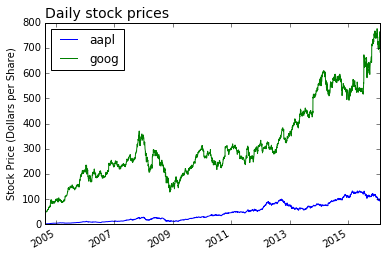

In [159]:
ax = prices['Close'].dropna().plot()
ax.set_title('Daily stock prices', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Stock Price (Dollars per Share)')

## Example:  Fama-French equity returns

Gene Fama and Ken French are two of the leading academics studying (primarily) equity returns.  We'll look at what have come to be called the Fama-French factors, available on [French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).  The data includes:

* xsm:  the return on the market (aggregate equity) minus the riskfree rate
* smb (small minus big):  the return on small firms minus the return on big firms 
* hml (high minus low):  the return on firms with high book-to-market ratios minus the return on those with low ratios. 
* rf:  the riskfree rate. 

In [160]:
# load packages 
import pandas.io.data as web      

# read data from Ken French's website 
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench')[0] 
# NB:  ff.xs is a conflict, rename to xsm  
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff.describe()

,xsm,smb,hml,rf
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,0.647458,0.213864,0.381294,0.280736
std,5.388924,3.223139,3.529096,0.254651
min,-29.130000,-16.700000,-13.280000,-0.060000
25%,-2.027500,-1.560000,-1.290000,0.040000
50%,1.010000,0.060000,0.215000,0.250000
75%,3.650000,1.787500,1.730000,0.430000
max,38.850000,36.700000,35.460000,1.350000


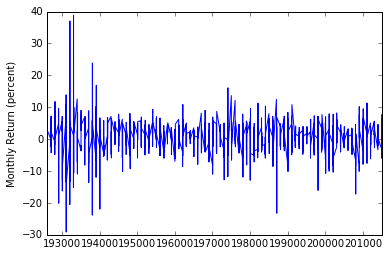

In [161]:
# some plots 
ax = ff['xsm'].plot()
ax.set_ylabel('Monthly Return (percent)')
#ax.set_xticks([1950, 1, 1), (1990, 1, 1)])  # fix x-axis "ticks"

In [163]:
# statistics 
ff.describe()

,xsm,smb,hml,rf
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,0.647458,0.213864,0.381294,0.280736
std,5.388924,3.223139,3.529096,0.254651
min,-29.130000,-16.700000,-13.280000,-0.060000
25%,-2.027500,-1.560000,-1.290000,0.040000
50%,1.010000,0.060000,0.215000,0.250000
75%,3.650000,1.787500,1.730000,0.430000
max,38.850000,36.700000,35.460000,1.350000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001222BCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000120EFF98>]], dtype=object)

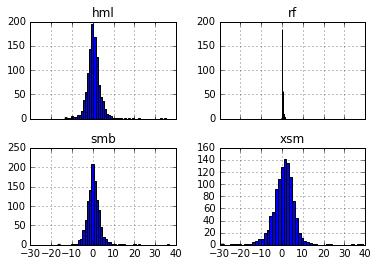

In [164]:
# histograms 
ff.hist(bins=50, sharex=True)

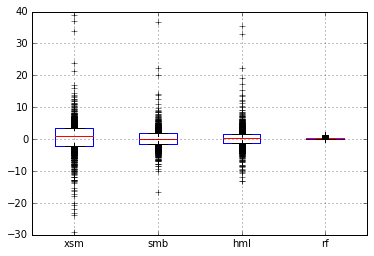

In [165]:
ff.boxplot(whis=0, return_type='axes')

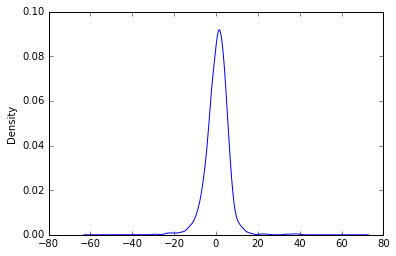

In [166]:
ax = ff['xsm'].plot(kind='kde')

**Comment.** It's hard to see from this picture, but one of the striking things about equity returns is that they're not **[normal](https://en.wikipedia.org/wiki/Normal_distribution)**, by which we mean the bell-shaped distribution we often run across in classes.  Equity returns have more frequent extreme returns, both high and low, than if they were normal.  One of the issues we'll address later is how to capture this difference. The same feature (more or less) shows up in option prices.  

## Example:  Options data

The Pandas code (labeled "experimental") is currently broken.  We'll come back to this when we talk about "scraping." 

In [167]:
# pandas code from docs 
"""
from pandas.io.data import Options
aapl = Options('aapl', 'yahoo')
data = aapl.get_all_data()
"""
"""
import datetime as dt 
aapl = Options('aapl', 'yahoo')
expiry = dt.date(2016, 3, 24)
data = aapl.get_call_data(expiry=expiry)
"""

"\nimport datetime as dt \naapl = Options('aapl', 'yahoo')\nexpiry = dt.date(2016, 3, 24)\ndata = aapl.get_call_data(expiry=expiry)\n"

## Example:  Income by College Major 

From the 538 blog.  

In [168]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
url2 = 'college-majors/recent-grads.csv'
url = url1 + url2
df538 = pd.read_csv(url)
df538 = df538.set_index('Major')
df538['Median'] = df538['Median']/1000
df538.shape

(173, 20)

In [179]:
df538.head(3)[list(range(11))]

,Rank,Major_code,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time
Major,,,,,,,,,,,
PETROLEUM ENGINEERING,1,2419,Engineering,2339,36,2057,282,0.120564,1976,1849,270
MINING AND MINERAL ENGINEERING,2,2416,Engineering,756,7,679,77,0.101852,640,556,170
METALLURGICAL ENGINEERING,3,2415,Engineering,856,3,725,131,0.153037,648,558,133


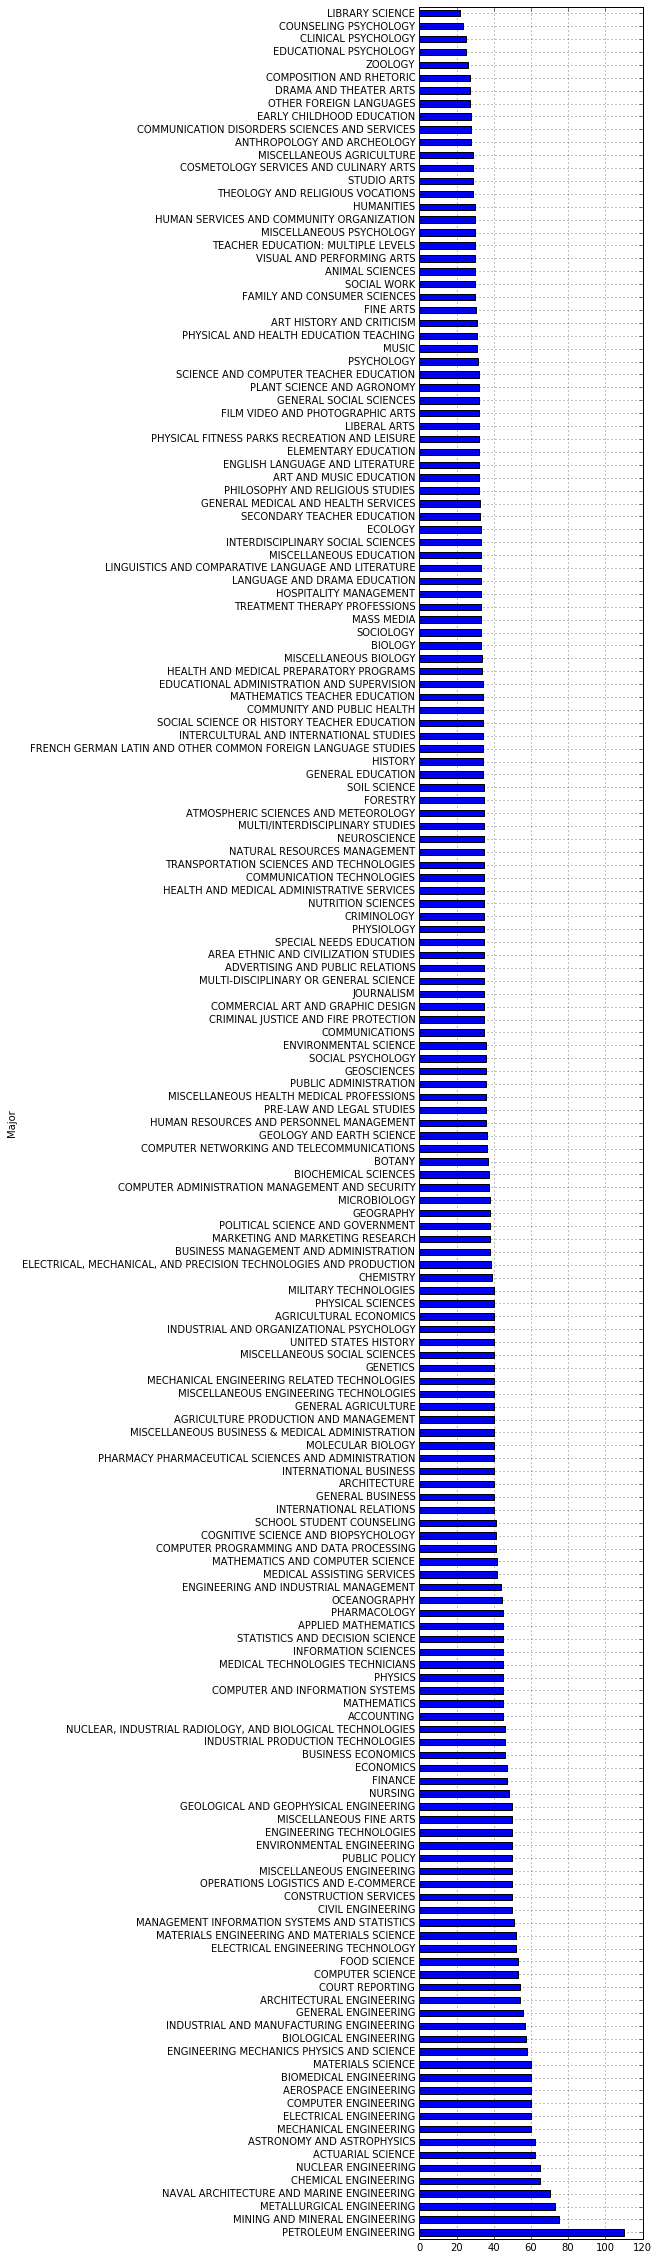

In [170]:
ax = df538['Median'].plot(kind='barh', figsize=(4, 40), grid=True)

**Comment.**  This is way too much information.  We should probably pick the 10 most popular majors and graph them alone.  

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Japan's aging population 

Data from the [UN's Population Division](http://esa.un.org/unpd/wpp/Download/Standard/Population/).  One of our favorite quotes:

> Last year, for the first time, sales of adult diapers in Japan exceeded those for babies. 

This is what the numbers look like.  They're UN projections, what they call the "medium variant." 

In [171]:
%%time
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

"""
for later:  change cols for the two sources, rename 80+ to 80-84, then concat 
#pop = pd.concat([est, prj], axis=0, join='outer')      
"""
pop = prj 

Wall time: 54 s


In [172]:
# rename some variables 
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select Japan and years 
countries = ['Japan']
years     = [2015, 2025, 2035, 2045, 2055, 2065]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop = pop.set_index('Year').T

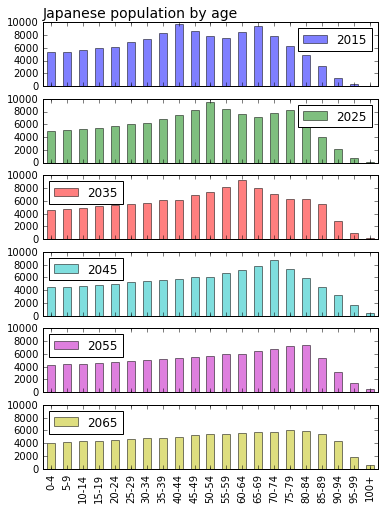

In [173]:
ax = pop.plot(kind='bar', #color='blue', 
              alpha=0.5, subplots=True, sharey=True, figsize=(6, 8))
for axnum in range(len(ax)):  
    ax[axnum].set_title('')
    
ax[0].set_title('Japanese population by age', fontsize=14, loc='left')   

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

**Question for Chase or Spencer:**  Can we set up an interaction here?

## Example:  Birth rates

We might wonder, why is the population falling in Japan?  Other countries?  Well, one reason is that birth rates are falling.  Demographers call this fertility.  Here we look at the fertility using the same [UN source](http://esa.un.org/unpd/wpp/Download/Standard/Fertility/) as the previous example.  We look at two variables:  total fertility and fertility by age of mother.  In both cases we explore the numbers to date, but the same files contain projections of future fertility.  

In [174]:
%%time
import pandas as pd 

# fertility overall 
uft  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
uft += '1_Indicators%20(Standard)/EXCEL_FILES/'
uft += '2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

cols = [2, 4] + list(range(5,18))
ftot = pd.read_excel(uft, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

# fertility by age 
ufa  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
ufa += '1_Indicators%20(Standard)/EXCEL_FILES/'
ufa += '2_Fertility/WPP2015_FERT_F07_AGE_SPECIFIC_FERTILITY.XLS'

#cols = [2, 4, 5] + list(range(6,13))
#fage = pd.read_excel(ufa, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

Wall time: 2.83 s


In [175]:
ftot.head(3)[list(range(10))]

,"Major area, region, country or area *",Country code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990
0,WORLD,900,4.961571,4.898665,5.024379,4.922202,4.475478,3.865195,3.591816,3.446811
1,More developed regions,901,2.823786,2.807368,2.685900,2.387534,2.150816,1.917349,1.843806,1.807382
2,Less developed regions,902,6.075417,5.941033,6.129418,6.034843,5.416602,4.585636,4.167889,3.917106


In [176]:
# rename some variables 
ftot = ftot.rename(columns={'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})

In [177]:
# drop code 
f = ftot.drop(['Code'], axis=1)

# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America']
f = f[f['Country'].isin(countries)]

# shape
f = f.set_index('Country').T 
f = f.rename(columns={'United States of America': 'United States'})
f.head()

Country,China,Japan,Germany,United States
1950-1955,6.107,2.999,2.1280,3.3300
1955-1960,5.476,2.155,2.2940,3.6745
1960-1965,6.150,1.986,2.4736,3.3959
1965-1970,6.300,2.020,2.3605,2.5791
1970-1975,4.850,2.134,1.7084,2.0178


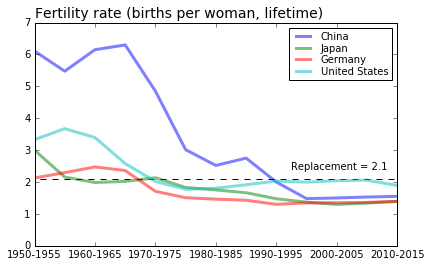

In [178]:
ax = f.plot(kind='line', alpha=0.5, lw=3, figsize=(6.5, 4))
ax.set_title('Fertility rate (births per woman, lifetime)', fontsize=14, loc='left')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)
ax.hlines(2.1, -1, 13, linestyles='dashed')
ax.text(8.5, 2.4, 'Replacement = 2.1')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    